In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import os
from scipy.optimize import curve_fit
from matplotlib.gridspec import GridSpec

print(os.getcwd())
np.seterr(divide='ignore') #Ignore division by 0

from matplotlib import rc #For Latex fonts
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

TEXpath = '/home/HAL-7559/Documents/Tex/Master/QMT/thesis/img/'

/home/HAL-7559/Documents/Jupyter/Master


In [193]:
def myPlot_simple(x_data,y_data,legend,labels):
    
    #plt.style.use('grayscale')
    
    def_colors = ["#1F77B4","#2C77AA","#3978A0","#477897","#54798D","#617983","#6E7A79","#7B7A70","#887B66",
                  "#967B5C","#A37C52","#B07C49","#BD7D3F","#CA7D35","#D77E2B","#E57E22","#F27F18","#FF7F0E"]
    
    #gradient = ["03045e","023e8a","0077b6","0096c7","00b4d8","48cae4","90e0ef","ade8f4","caf0f8"]
    #def_colors = ["#{}".format(i) for i in gradient]
    
    mark = ['-*', '-o','-v','-x','-+']
    ls=['--','-.',':','--','-']
    
    fig = plt.figure(figsize=(10,6))
    titleSize = 25
    x_labelSize = 25
    y_labelSize = 50
    tickSize = 20
    
    plt.title(labels[0],fontsize=titleSize,loc='center')
    plt.xlabel(labels[1],fontsize=x_labelSize,labelpad=10,loc='center')
    plt.ylabel(labels[2],fontsize=y_labelSize,labelpad=40,rotation=0,loc='center')
    plt.xticks(fontsize = tickSize)
    plt.yticks(fontsize = tickSize)
    plt.tick_params(axis='both', which='minor', labelsize=16)

    for i in range(len(x_data)):
        plt.plot(x_data[i],y_data[i],label=legend[i],color=def_colors[i])
        
    plt.loglog()
    #plt.legend(fontsize=16)#loc='upper center', bbox_to_anchor=(0.515, 1.05),prop={'size': 16}, ncol=len(x_data))
    fig.legend(loc='upper left', bbox_to_anchor=(0.9, 0.9),prop={'size': 14}, ncol=1)


def myPlot(x_data,y_data,uq,dq,legend,labels,params):
    
    def_colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd',
                  '#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf']
    
    mark = ['-*', '-o','-v','-x','-+']
    ls=['--','-.',':','--','-']
    
    fig = plt.figure(figsize=(10,6))
    titleSize = 20
    x_labelSize = 35
    y_labelSize = 50
    tickSize = 20
    
    plt.title(labels[0],fontsize=titleSize,x=.2,y=0.9)
    plt.xlabel(labels[1],fontsize=x_labelSize,labelpad=10)
    plt.ylabel(labels[2],fontsize=y_labelSize,labelpad=40,rotation=0,loc='center')
    plt.xticks(fontsize = tickSize)
    plt.yticks(fontsize = tickSize)
    plt.tick_params(axis='both', which='minor', labelsize=16)

    for i in range(len(x_data)):
        plt.plot(x_data[i],y_data[i][y_data[i]!=0],mark[i],label="{}".format(legend[i]),color=def_colors[i])
        #plt.plot(x_data[i],errorBound(params[i],x_data[i]),linestyle=ls[i],color=def_colors[i], label="{} Bound".format(legend[i]))
        plt.fill_between(x[i], dq[i][dq[i]!=0]**2,uq[i][uq[i]!=0]**2, color=def_colors[i], alpha=.1)
        
        parameters,_ = curve_fit(exp_fit, list(x_data[i]), list(y_data[i][y_data[i]!=0]),maxfev = 1000)
        print(parameters)
    
    plt.plot(x_data[0],errorBound(params[0],x_data[0]),linestyle='--',color='k', label="Ana. Bound")
    plt.loglog()
    fig.legend(loc='upper center', bbox_to_anchor=(0.515, .98),prop={'size': 16}, ncol=5)
    

    
def errorBound(params,x_data):
    var = int(np.where(np.array(params)==0)[0]) #find which variable is missing
    bound = np.zeros(len(x_data))
    
    switcher = {
        #0: [ 50*d**3*params[2]**2*math.log(2*params[2]*d)/(3*params[3]) for d in x_data ],
        #1: [],
        2: [ 50*params[0]**3*k**2*math.log(2*k*params[0])/(3*params[3]) for k in x_data ],
        #3: [ 50*params[0]**3*params[2]**2*math.log(2*params[2]*params[0])/(3*N) for N in x_data ]
    }
    
    return switcher.get(var, bound)
    
def d_fit(x,A,B,C,D):
    y = A*x**B*np.log(abs(C*x**D))
    return y

def exp_fit(x,A,B):
    y = A*x**B
    return y  
    
    

In [214]:
# Load mets_diamond
# LS, AP, LSDP, CVX, Rand

### N ###
N_params = [[8,2,4,0],[6,6,3,0],[3,1,3,0]]
N_range = [np.arange(50,1050,50),np.arange(50,1050,50),np.arange(50,1050,50)]

### d ###
d_params = [[0,5,10,100],[0,7,5,100],[0,6,3,100]]
d_range = [np.arange(2,17,1),np.arange(2,17,1),np.arange(2,17,1)]

### K ###
K_params = [[10,5,0,100],[6,3,0,100],[3,2,0,100]]
K_range = [np.arange(2,15,1),np.arange(2,15,1),np.arange(2,15,1)]

x = K_range
params = K_params
mets = len(x)

lim = max([len(i) for i in x])

#median
median_error = np.zeros((mets,lim))
#quantiles
uq = np.zeros((mets,lim))
dq = np.zeros((mets,lim))

for i in range(mets):
    for j in range(len(x[i])):
        d,r,k,n_samp = params[i]
        data = np.load("./Data/mets_diamond_k/P_drkn_{}_{}_{}_{}.npy".format(d,r,x[i][j],n_samp))[3]
        median_error[i][j] = np.median(data)**2
        uq[i][j] = np.quantile(data,.025) # 2\sigma confidence region
        dq[i][j] = np.quantile(data,.975)

[0.039359   2.89489601]
[0.2063524  0.94743671]
[0.3196633  0.77514671]
[5.09253421e-04 2.76343402e+00]


(2, 14)

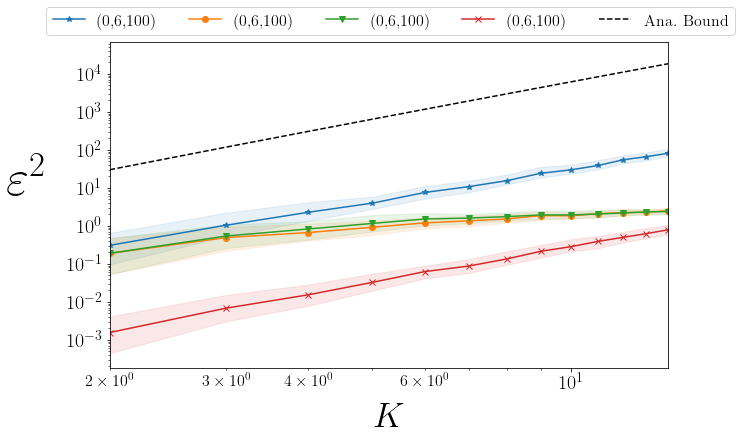

In [94]:
labels = ["",r"$K$",r"$\varepsilon^2$"]
legend = ["({},{},{})".format(p[0],p[1],p[3]) for p in params]

myPlot(x,median_error,uq,dq,legend,labels,params)
plt.xlim([2,14])

#plt.savefig("{}CVX_k.png".format(TEXpath),bbox_inches="tight",dpi=200)

In [194]:
### N ###
N_params = [[8,2,4,0],[6,6,3,0],[3,1,3,0]]
N_range = [np.arange(50,1050,50),np.arange(50,1050,50),np.arange(50,1050,50)]

### d ###
d_params = [[0,5,10,100],[0,7,5,100],[0,6,3,100]]
d_range = [np.arange(2,17,1),np.arange(2,17,1),np.arange(2,17,1)]

### K ###
K_params = [[10,5,0,100],[6,3,0,100],[3,2,0,100]]
K_range = [np.arange(2,15,1),np.arange(2,15,1),np.arange(2,15,1)]

metLabels = ['LS', 'APLS', 'LSSP', 'CVX', 'Rand']

mets = 4
params = [K_params[0] for _ in range(mets)]

x = [K_range[0] for _ in range(mets)]

#median
lim=len(x[0])
median_error = np.zeros((mets,lim))
#quantiles
uq = np.zeros((mets,lim))
dq = np.zeros((mets,lim))

for i in range(mets):
    for j in range(len(x[0])):
        d,r,k,n_samp = params[i]
        data = np.load("./Data/mets_diamond_k/P_drkn_{}_{}_{}_{}.npy".format(d,r,x[i][j],n_samp))[i]
        median_error[i][j] = np.median(data)**2
        uq[i][j] = np.quantile(data,.025) # 2\sigma confidence region
        dq[i][j] = np.quantile(data,.975)

[11.69164203  0.92888571]
[0.76879809 0.87648461]
[1.50003972 0.41897026]
[0.13096982 0.71065928]


(2, 14)

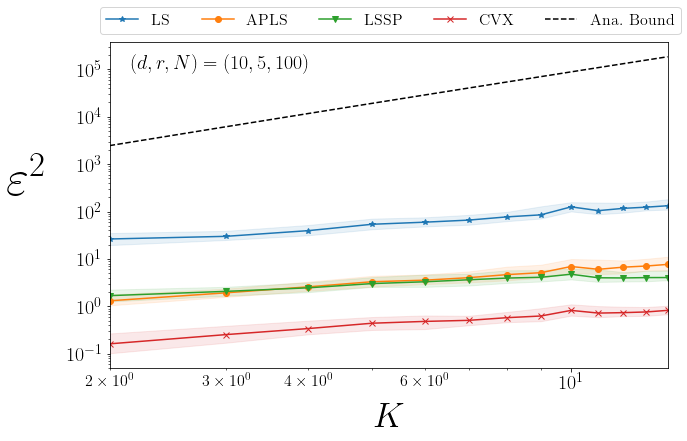

In [199]:
labels = [r"$(d,r,N)=({},{},{})$".format(params[0][0],params[0][1],params[0][3]),r"$K$",r"$\varepsilon^2$"]
legend = metLabels

myPlot(x,median_error,uq,dq,legend,labels,params)
plt.xlim([2,14])
#plt.ylim([0.01,1000])
#plt.axline((50,2),(51,2), color='r',linestyle='--')

#plt.savefig("{}comp_d_10.png".format(TEXpath),bbox_inches="tight",dpi=200)

In [164]:
#load data for N

params = [[8,2,4,0],[6,6,3,0],[3,1,3,0]]
mets = len(params)

x1 = np.arange(50,1050,50)

x=[x1,x1,x1]

lim = max([len(i) for i in x])

#median
median_error = np.zeros((mets,lim))
#quantiles
uq = np.zeros((mets,lim))
dq = np.zeros((mets,lim))

for i in range(mets):
    for j in range(len(x[i])):
        d,r,k,n_samp = params[i]
        data = np.load("./Data/runs_LS_diamond_n/LS_drkn_{}_{}_{}_{}.npy".format(d,r,k,x[i][j]))
        median_error[i][j] = np.median(data)**2
        uq[i][j] = np.quantile(data,.025) # 2\sigma confidence region
        dq[i][j] = np.quantile(data,.975)
        

[ 2.67584700e+03 -1.04421229e+00]
[778.16546747  -1.00540204]
[97.9784917  -0.99890947]


(50, 1000)

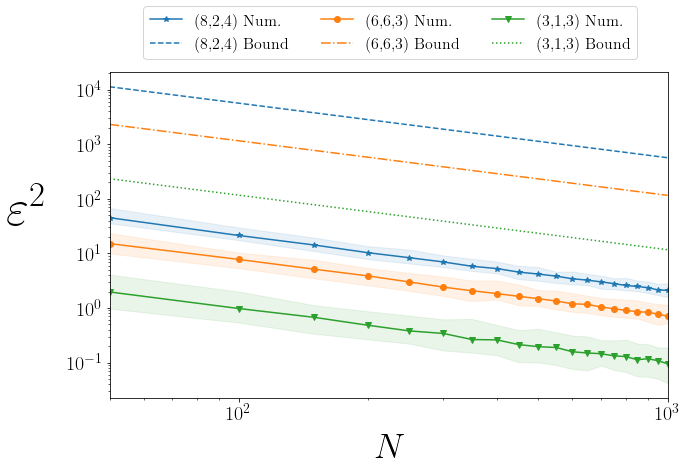

In [169]:
labels = ["",r"$N$",r"$\varepsilon^2$"]
legend = ["({},{},{})".format(p[0],p[1],p[2]) for p in params]

myPlot(x,median_error,uq,dq,legend,labels,params)
plt.xlim([50,1000])

#plt.savefig("{}LS_N.png".format(TEXpath),bbox_inches="tight",dpi=200)

In [186]:
#load data for d

params = [[0,5,10,100],[0,7,5,100],[0,6,3,100]]
mets = len(params)

x = [np.arange(2,19,1),np.arange(2,30,1),np.arange(2,19,1)]

lim = max([len(i) for i in x])

#median
median_error = np.zeros((mets,lim))
#quantiles
uq = np.zeros((mets,lim))
dq = np.zeros((mets,lim))

for i in range(mets):
    for j in range(len(x[i])):
        d,r,k,n_samp = params[i]
        data = np.load("./Data/runs_diaCVX_LS_d/LS_drkn_{}_{}_{}_{}.npy".format(x[i][j],r,k,n_samp))
        median_error[i][j] = np.median(data)**2
        uq[i][j] = np.quantile(data,.025) # 2\sigma confidence region
        dq[i][j] = np.quantile(data,.975)


[0.13150386 2.87914405]
[0.06092171 2.90358953]
[0.0342791  2.94951443]


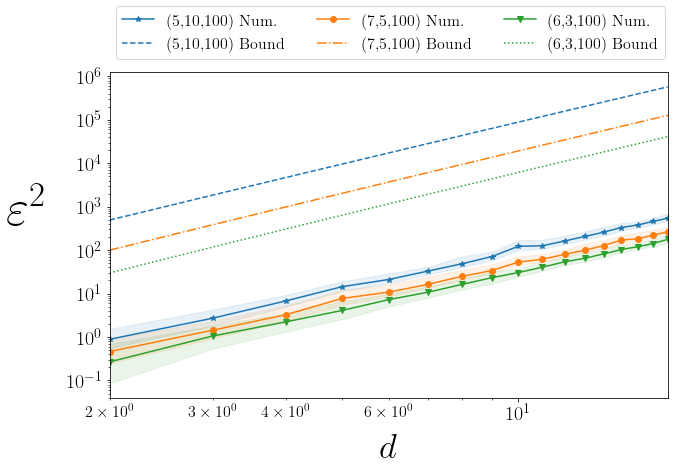

In [189]:
labels = ["",r"$d$",r"$\varepsilon^2$"]
legend = ["({},{},{})".format(p[1],p[2],p[3]) for p in params] #r,k,N

myPlot(x,median_error,uq,dq,legend,labels,params)
plt.xlim([2,18])

#plt.savefig("{}LS_d.png".format(TEXpath),bbox_inches="tight",dpi=200)

In [178]:
#load data for k

params = [[10,5,0,100],[6,3,0,100],[3,2,0,100]]
mets = len(params)

x = [np.arange(2,17,1),np.arange(2,25,1),np.arange(2,36,1)]

lim = max([len(i) for i in x])

#median
median_error = np.zeros((mets,lim))
#quantiles
uq = np.zeros((mets,lim))
dq = np.zeros((mets,lim))

for i in range(mets):
    for j in range(len(x[i])):
        d,r,k,n_samp = params[i]
        data = np.load("./Data/runs_LS_diamond_k/LS_drkn_{}_{}_{}_{}.npy".format(d,r,x[i][j],n_samp))[0]
        median_error[i][j] = np.median(data)**2
        uq[i][j] = np.quantile(data,.025) # 2\sigma confidence region
        dq[i][j] = np.quantile(data,.975)

[10.84789335  0.95998599]
[2.46579983 0.95582886]
[0.33734625 0.9235114 ]


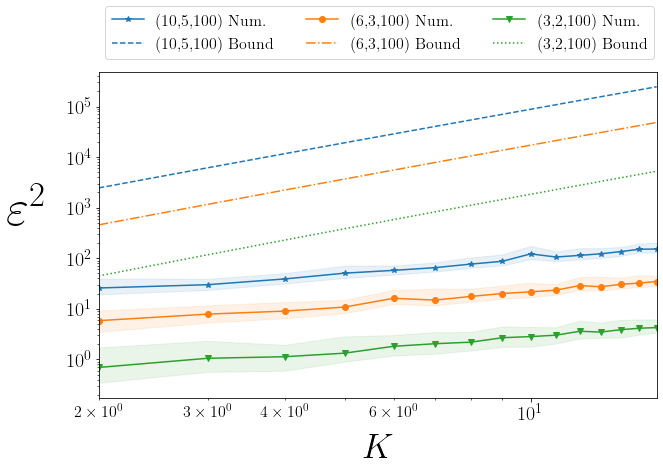

In [184]:
labels = ["",r"$K$",r"$\varepsilon^2$"]
legend = ["({},{},{})".format(p[0],p[1],p[3]) for p in params] #r,k,N

myPlot(x,median_error,uq,dq,legend,labels,params)
plt.xlim([2,16])

#plt.savefig("{}LS_k.png".format(TEXpath),bbox_inches="tight",dpi=200)

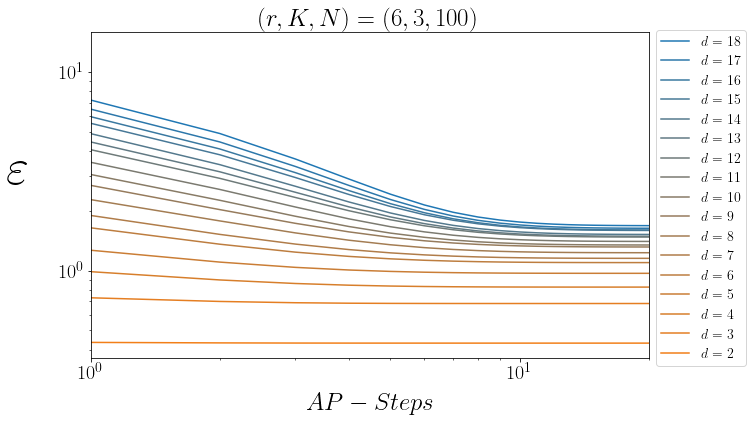

In [142]:
AP = 20
N=100


# For d
x = np.arange(2,19,1)
d,r,k,n_samp = [0,6,3,100]

#for K
#x = np.arange(2,17,1)
#d,r,k,n_samp = [3,2,0,100]

#for r
#x = np.arange(1,8,1)
#d,r,k,n_samp = [7,0,7,100]


y = np.arange(0,AP+1,1)
results = np.empty(len(x),dtype=list)
y_data = [ y for _ in range(len(results))]


for i in range(len(x)):
    results[i] = np.load("./Data/runs_APLS_d/AP_{}_{}_{}_{}_AP{}.npy".format(x[i],r,k,n_samp,AP))

x_data = [ 1/N*np.asarray(results[len(results)-1-i]).sum(axis=0) for i in range(len(results))]
legend = ["$d =$ {}".format(x[len(x)-1-i]) for i in range(len(x))]
labels = [r"$(r,K,N) = (6,3,100)$",r"$AP-Steps$",r"$\varepsilon$"]

myPlot_simple(y_data,x_data,legend,labels)
plt.xlim([1,AP])
#plt.ylim([1,5])

#plt.savefig("{}AP_d.png".format(TEXpath),bbox_inches="tight",dpi=200)